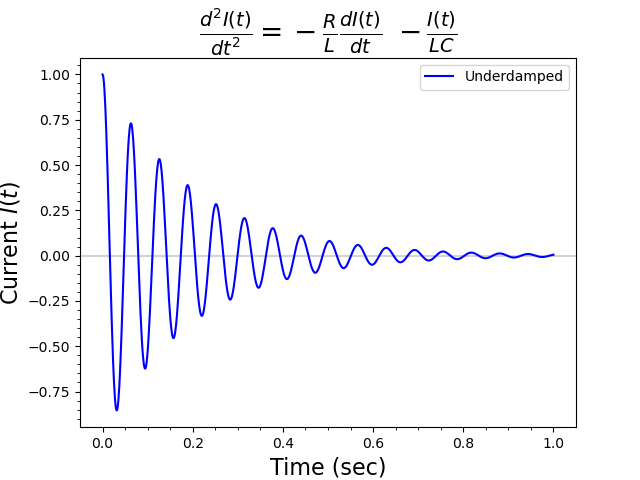

In [1]:
# rlc_circuit.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import solve_ivp


def model(time, state_vector, phase_constant, damping_constant):
    theta, i = state_vector  # unpack dependent variables
    #I'm calling the first derivative of i "theta"
    d_theta = -damping_constant * theta - phase_constant * i
    d_i = theta
    return d_theta, d_i


def plot(ax):
    # Precalculate phase constant
    l = c = 0.01 #(henries and farads respectively)
    phase_constant = 1 / (l * c)

    # Set damping_constants
    r = 0.1 #ohms
    underdamped_constant = r / l

    # Set initial conditions
    theta_initial = 0 #no change in I(t) to start
    i_initial = 1

    # Set model duration (seconds)
    time_initial = 0
    time_final = 1

    # Calculate for an underdamped pendulum
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [theta_initial, i_initial],
        max_step=0.001, #curve looks "choppy" if the max_step is too large
        args=[phase_constant, underdamped_constant],
    )
    time_steps = sol.t
    theta_underdamped = sol.y[1]

    ax.plot(
        time_steps,
        theta_underdamped,
        label="Underdamped", #underdamped in blue
        color="blue",
        linestyle="solid",
        zorder=3,
    )

    ax.set_title(r"$\frac{d^{2}I(t)}{dt^2} =-\frac{R}{L}\frac{dI(t)}{dt}$"
                 r'$ \ - \frac{I(t)}{LC}$', fontsize=20)
    ax.set_xlabel("Time (sec)", fontsize=16)
    ax.set_ylabel(r"$ \mathrm{Current} \ I(t)$", fontsize=16)
    ax.axhline(y=0.0, color="lightgray")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.legend(loc="upper right")


def main():
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()
    
main()

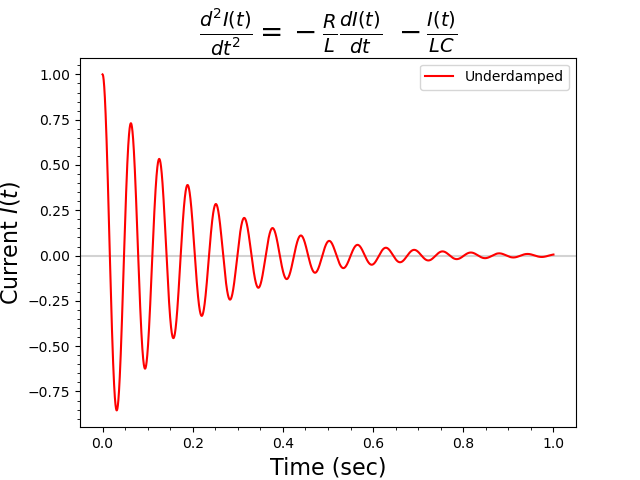

In [2]:
# rlc_circuit.ipynb
# Cell 2

def f(x, r, l, c, i_init):
    b = r / (2 * l)
    w = np.sqrt(1 / (l * c) - (r**2 / 4 * l**2))
    d = (i_init * b) / w
    return np.exp(-b * x) * (i_init * np.cos(w * x) + d * np.sin(w * x))
#This is the analytical solution to the ODE given to us in the problem. I pulled
#this straight from the semester research paper I wrote for my diff eq class. 
#I included the pdf in the email attachments. It goes through the 
#derivation. Specifically, eq (14) is the result you're looking for there.

def plot(ax):
    r = 0.1
    l = c = 0.01
    i_init = 1
    
    x = np.linspace(0, 1, 10_000)
    
    ax.plot(
        x,
        f(x, r, l, c, i_init),
        label="Underdamped", #underdamped in red
        color="red",
        linestyle="solid",
        zorder=3,
    )

    ax.set_title(r"$\frac{d^{2}I(t)}{dt^2} =-\frac{R}{L}\frac{dI(t)}{dt}$"
                 r'$ \ - \frac{I(t)}{LC}$', fontsize=20)
    ax.set_xlabel("Time (sec)", fontsize=16)
    ax.set_ylabel(r"$ \mathrm{Current} \ I(t)$", fontsize=16)
    ax.axhline(y=0.0, color="lightgray")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.legend(loc="upper right")


def main():
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()
    
main()